In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

### Monte Carlo simulation to simulate 10 different versions of Microsoft's stock price for the next 500 days. 

In [2]:
stock = ['MSFT']
data = pd.DataFrame()
data[stock] = wb.DataReader(stock, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

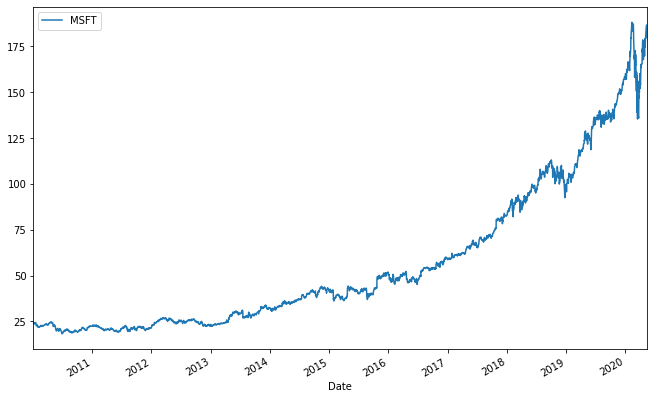

In [3]:
data.plot(figsize=(11,7))

In [4]:
log_returns = np.log(1+data.pct_change())
log_returns.tail()

,MSFT
Date,
2020-05-08,0.005865
2020-05-11,0.011093
2020-05-12,-0.022912
2020-05-13,-0.015238
2020-05-14,0.004330


## Geometric Brownian motion
## $S_t = S_o.e^{(m-\frac{1}{2}std^2) + std.Z(0;1)}$

In [5]:
m = log_returns.mean()
variance = log_returns.var()

In [6]:
drift = m - (0.5 * variance)
drift

MSFT    0.000644
dtype: float64

In [7]:
std = log_returns.std()
std

MSFT    0.015816
dtype: float64

### Predicting 10 different versions of MSFT's stock price for the next 500 days based on the historical data

In [8]:
t_intervals = 500
iterations = 10

In [9]:
d_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals, iterations)))
d_returns

array([[1.02417656, 0.99785031, 0.99294313, ..., 1.01620391, 1.00618662,
        1.01120895],
       [0.99783692, 0.98482645, 1.00019645, ..., 0.99942087, 0.97892081,
        1.00518986],
       [0.95067086, 0.99777061, 1.0024085 , ..., 1.05132056, 1.00011278,
        0.98677548],
       ...,
       [1.00172454, 0.98147917, 1.01573682, ..., 1.00707359, 0.97982134,
        1.00794456],
       [0.99616162, 1.01455123, 1.00289928, ..., 1.02218899, 1.00417601,
        1.00421363],
       [0.98556617, 0.9978639 , 1.01825972, ..., 1.00519191, 1.00555059,
        1.01419736]])

## $S_t = S_0 * dreturns_t$

In [10]:
S0 = data.iloc[-1]
S0

MSFT    180.529999
Name: 2020-05-14 00:00:00, dtype: float64

Have another array of the same size as d_returns, fill it with 0s. Let the first row of this new array be the last value from the historical returns i.e 181. We need the 10 different versions of the stock prices to start off with this number.

In [11]:
future_prices = np.zeros_like(d_returns)
future_prices

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
future_prices[0] = S0
future_prices

array([[180.52999878, 180.52999878, 180.52999878, ..., 180.52999878,
        180.52999878, 180.52999878],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [13]:
for t in range(1, t_intervals):
    future_prices[t] = future_prices[t-1] * d_returns[t]
future_prices

array([[180.52999878, 180.52999878, 180.52999878, ..., 180.52999878,
        180.52999878, 180.52999878],
       [180.1394975 , 177.79071765, 180.56546309, ..., 180.42544847,
        176.72457208, 181.46692415],
       [171.2533713 , 177.39435219, 181.00035492, ..., 189.68498263,
        176.74450309, 179.06711038],
       ...,
       [284.42090132, 296.42846136, 191.20343475, ..., 198.09659266,
        268.22771209, 186.51524137],
       [283.32918602, 300.74185875, 191.7577878 , ..., 202.49215576,
        269.34783318, 187.30114829],
       [279.23966136, 300.0994437 , 195.2592312 , ..., 203.54347623,
        270.8428724 , 189.96032962]])

Now lets generate a plot of the 10 different simulations

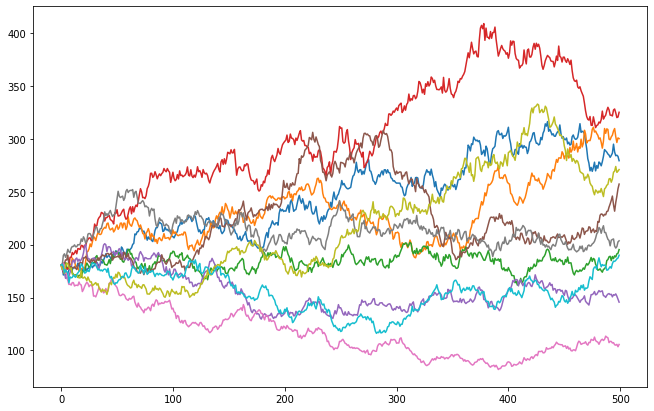

In [14]:
plt.figure(figsize=(11,7))
plt.plot(future_prices)

In [21]:
avg_final_price = future_prices[-1].mean()
avg_final_price

227.22918574896772

In [22]:
future_prices.max()

408.7493440258564

In [23]:
future_prices.min()

81.9861143098569

In [24]:
final_avg_return = avg_final_price / data.iloc[-1]
final_avg_return

MSFT    1.258678
Name: 2020-05-14 00:00:00, dtype: float64

Based on this simulation only (excluding all other factors), I can conclude MSFT would be a good investment. On avg, taking into account all 10 simulations, we can hopefully expect a 26% return after 500 days, with more possiilities of the stocks going over the final historical price of $181 than going below it. However, there are a lot more factors involved when it comes to investing. This is not investment advice. Other factors, such as PE ratio, beta, fundamentals etc should be looked at before investing. 